# Quality Assurance

This Notebook will help you to run the more advanced quality checks and to visualize the data produced:
- Advanced quality checks present in the envass library (https://github.com/eawag-surface-waters-research/envass/)
- Individual quality check: visualisation and selection of non-trusted data 
- Update changes into a json file and log.txt

As computational power is not unlimited and data are sometimes big, performing the visualization on a subset is highly recommended.


In [1]:
import json 
import copy
from functions import quality_flags, update_log
from functions import import_nc_files, plot_grid, plot_2d_data, json_converter

### Import Data

In [2]:
RDI_mode = "300"
folder = f"../data/Level1/RDI{RDI_mode}/"
qa_file = '../quality_assurance.json'

In [3]:
ds = import_nc_files(folder, '202008')
qa_original = json_converter(json.load(open(qa_file)))

### Plot Current Data

c:\Users\cruzhugo\Downloads\adcp-v2\notebooks\functions.py:63: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



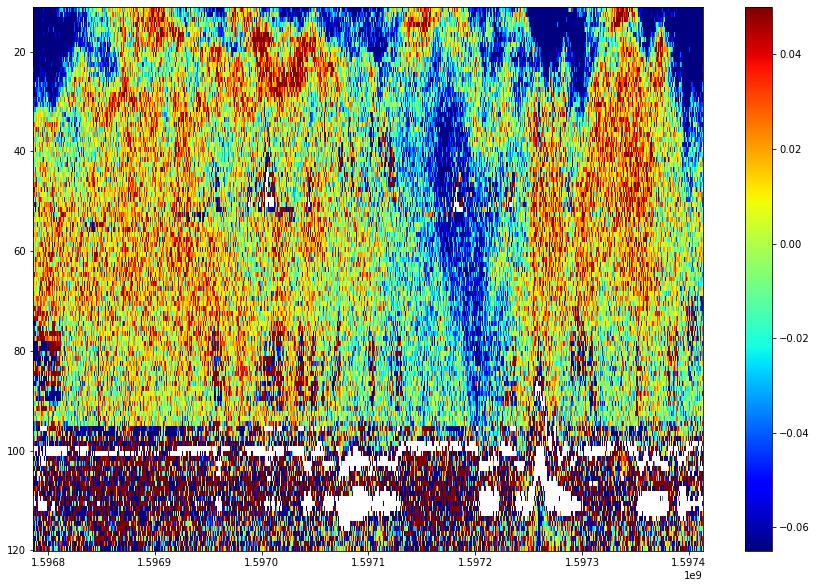

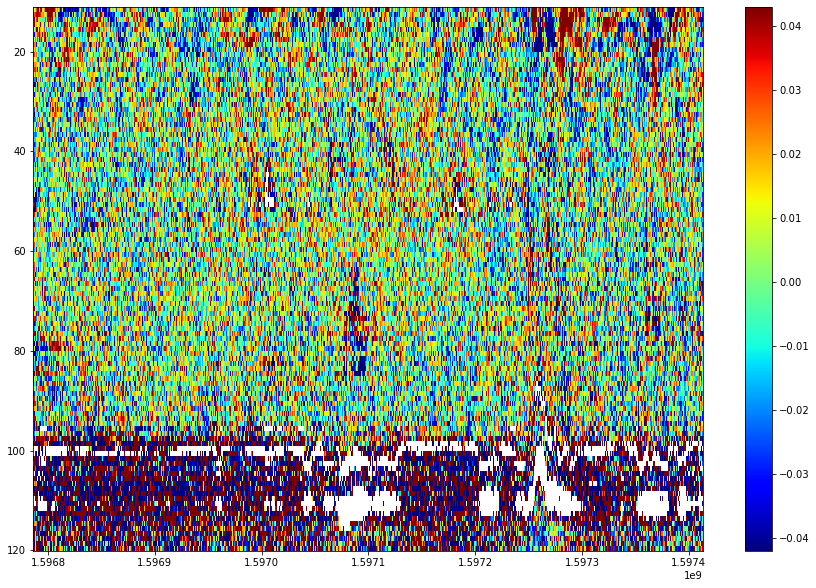

In [4]:
plot_2d_data(ds, qa_original.keys())

### Experiment With Checks 

2D array recognized
2D array recognized


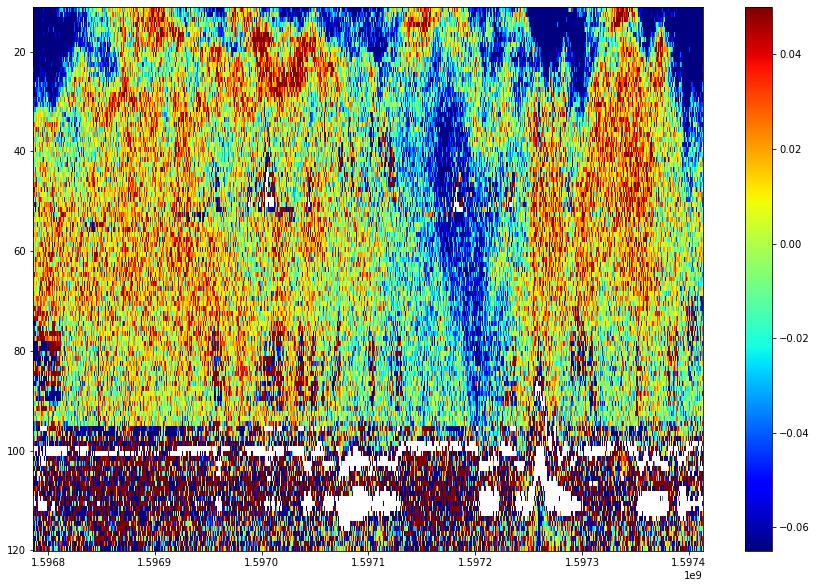

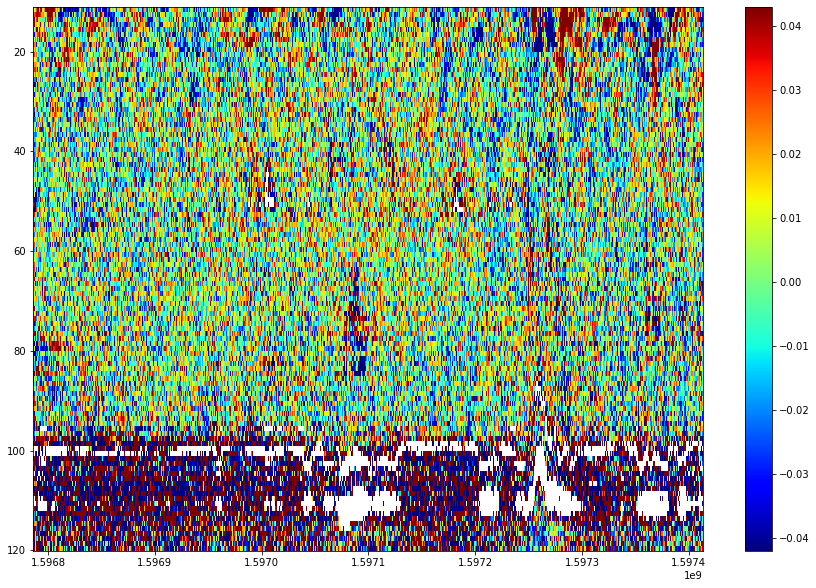

In [5]:
qa = copy.deepcopy(qa_original)
qa["u"]["simple"]["bounds"][1] = 6

ds = quality_flags(qa, ds, erase_qa=True)
plot_2d_data(ds, qa.keys())

### Write QA to File

In [6]:
update_json=False
if update_json:
    qa["time"]["simple"]["bounds"][1] = "now"
    with open(qa_file, 'r+') as fp:
        json.dump(qa, fp)
    update_log(qa, qa_original, "u") 

In [14]:

folder_L2 = f"../data/Level2/RDI{RDI_mode}/"
ds_L2 = import_nc_files(folder_L2, '202008')
qa = copy.deepcopy(qa_original)

c:\Users\cruzhugo\Downloads\adcp-v2\notebooks\functions.py:63: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



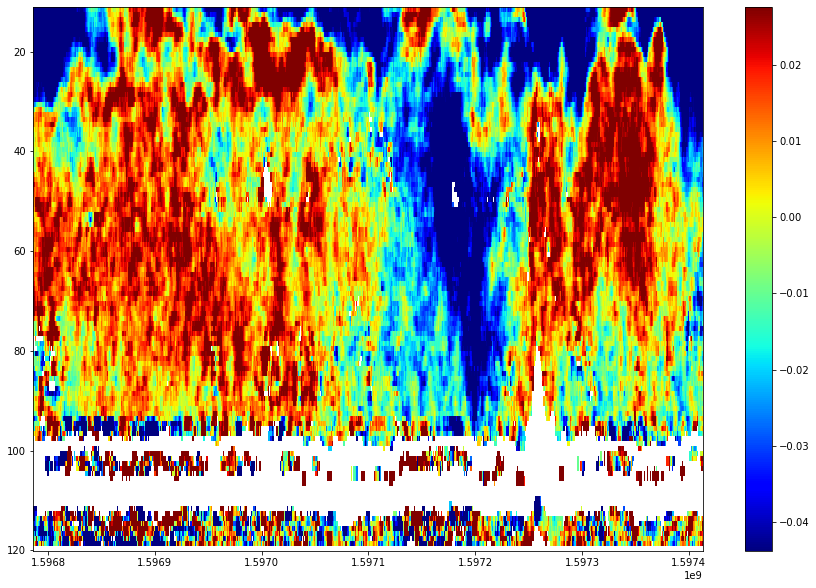

In [16]:
plot_2d_data(ds_L2, "u")